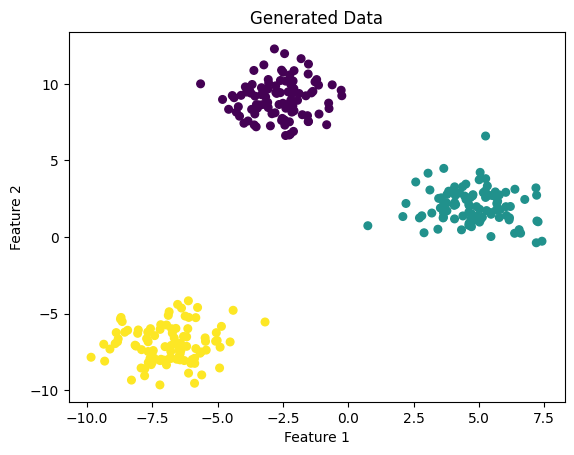

Confusion Matrix:
 [[100   0   0]
 [  0 100   0]
 [  0   0 100]]
Accuracy: 100.00%


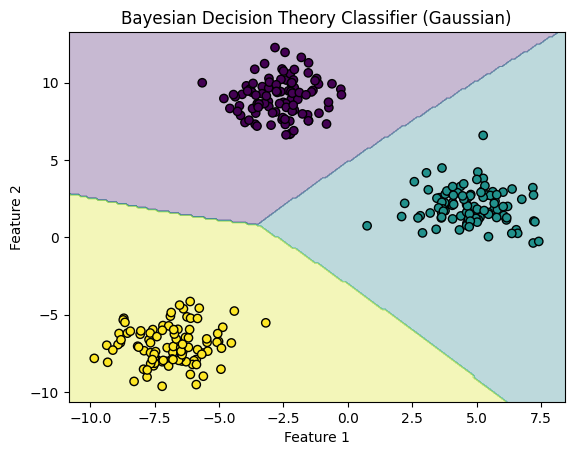

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import confusion_matrix, accuracy_score

# ---------------------------
# 1. Generate synthetic dataset
# ---------------------------
np.random.seed(42)
X, y = make_blobs(n_samples=300, centers=3, n_features=2, cluster_std=1.2)

# Plot the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=30)
plt.title("Generated Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# ---------------------------
# 2. Compute class parameters
# ---------------------------
classes = np.unique(y)
n_classes = len(classes)
priors = []
means = []
covariances = []

for c in classes:
    X_c = X[y == c]
    priors.append(len(X_c) / len(X))          # Prior P(w_i)
    means.append(np.mean(X_c, axis=0))        # Mean vector
    covariances.append(np.cov(X_c.T))         # Covariance matrix

priors = np.array(priors)

# ---------------------------
# 3. Define functions for likelihood and posterior
# ---------------------------

def multivariate_gaussian(x, mean, cov):
    """Compute multivariate Gaussian PDF."""
    d = len(mean)
    cov_det = np.linalg.det(cov)
    cov_inv = np.linalg.inv(cov)
    norm_const = 1 / np.sqrt((2 * np.pi)**d * cov_det)
    x_mean = x - mean
    return norm_const * np.exp(-0.5 * x_mean.T @ cov_inv @ x_mean)

def bayesian_classifier(X):
    """Compute class posteriors and predict."""
    predictions = []
    posteriors = []

    for x in X:
        likelihoods = np.array([multivariate_gaussian(x, means[i], covariances[i]) for i in range(n_classes)])
        numerators = likelihoods * priors
        posterior = numerators / np.sum(numerators)
        posteriors.append(posterior)
        predictions.append(np.argmax(posterior))

    return np.array(predictions), np.array(posteriors)

# ---------------------------
# 4. Classify all points
# ---------------------------
y_pred, posteriors = bayesian_classifier(X)

# ---------------------------
# 5. Evaluate results
# ---------------------------
print("Confusion Matrix:\n", confusion_matrix(y, y_pred))
print("Accuracy: {:.2f}%".format(accuracy_score(y, y_pred) * 100))

# ---------------------------
# 6. Visualize decision boundaries
# ---------------------------
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
grid = np.c_[xx.ravel(), yy.ravel()]
Z, _ = bayesian_classifier(grid)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k')
plt.title("Bayesian Decision Theory Classifier (Gaussian)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
